In [4]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(twitter_training):
    return pd.read_csv(twitter_training)

In [29]:
df = pd.read_csv('D:/E_drive_data/PRODIGY/twitter_training.csv')

In [30]:
df

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('D:/E_drive_data/PRODIGY/twitter_training.csv')
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [47]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from plotly import graph_objs as go

In [31]:
df.shape

(74682, 4)

In [32]:
df.isnull().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    686
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

In [35]:
# shape before drop null value

df.shape

(73996, 4)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       73996 non-null  int64 
 1   Entity         73996 non-null  object
 2   Sentiment      73996 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [37]:

temp = df.groupby('Sentiment').count()['Tweet_ID'].reset_index().sort_values(by='Tweet_ID',ascending=False)
temp.style.background_gradient()

,Sentiment,Tweet_ID
1,Negative,22358
3,Positive,20655
2,Neutral,18108
0,Irrelevant,12875


<Axes: xlabel='Sentiment', ylabel='count'>

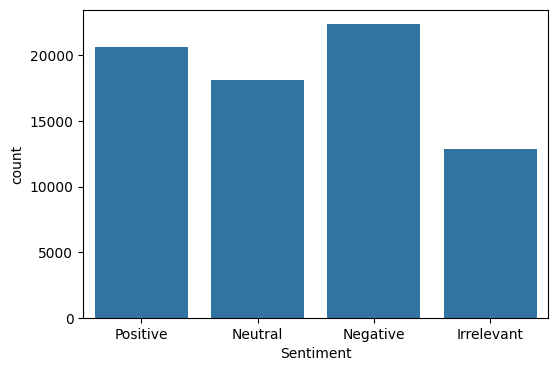

In [38]:
# plot sentiment graph

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment',data=df)

In [92]:
# pip install plotly
# from plotly import graph_objs as go
# fig = go.Figure(go.Funnelarea(
#     text =temp.Sentiment,
#     values = temp.Tweet_ID,
#     title = {"text": "Funnel-Chart of Sentiment Distribution"}
#     ))
# fig.show()

In [40]:
# remove punctuation

df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [41]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands and i will murder ...


In [42]:
columns = df.columns[1::] # only string columns

In [43]:
# convert to lower case

for col in columns:
    df[col] = df[col].str.lower()
df.head(1)

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,borderlands,positive,im getting on borderlands and i will murder yo...


In [44]:
# give numerical label for easy prediction

df['Sentiment'] = df['Sentiment'].map({'negative': 0, 'positive': 1, 'neutral' : 2, 'irrelevant' : 3})

In [45]:
df.head(1)

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,borderlands,1,im getting on borderlands and i will murder yo...


In [46]:
 # join the  entity & tweet_content for apply CountVectorizer

df['tweet'] = df['Entity'] + ' ' + df['Tweet_content']

In [25]:
df.head()

,Sentiment,tweet
0,1,borderlands im getting on borderlands and i wi...
1,1,borderlands i am coming to the borders and i w...
2,1,borderlands im getting on borderlands and i wi...
3,1,borderlands im coming on borderlands and i wil...
4,1,borderlands im getting on borderlands and i ...


In [47]:
# drop unnecessary column

df.drop(columns=['Tweet_ID', 'Entity', 'Tweet_content'], inplace=True)

In [48]:
df.head(1)

,Sentiment,tweet
0,1,borderlands im getting on borderlands and i wi...


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [50]:
countvector = CountVectorizer(ngram_range=(2, 2))

In [51]:
# fit the train data

traindataset = countvector.fit_transform(df['tweet'])

In [52]:
# its return sparse matrix

traindataset

<73996x305576 sparse matrix of type '<class 'numpy.int64'>'
	with 1313613 stored elements in Compressed Sparse Row format>

In [53]:
randomclassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomclassifier.fit(traindataset, df['Sentiment'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [72]:
# save model


import pickle

model_pkl_file = "D:/E_drive_data/PRODIGY/sentiment_analysis_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(randomclassifier, file)

In [55]:
# name = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_content']
df = pd.read_csv('D:/E_drive_data/PRODIGY/twitter_validation.csv')

In [56]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [57]:
df.isnull().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

In [58]:
df.shape


(1000, 4)

In [59]:
# remove punctuation

df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [60]:
df.head()


,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,Microsoft Why do I pay for WORD when it funct...
3,4371,CS GO,Negative,CSGO matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [62]:
df['tweet'] = df['Entity'] + ' ' + df['Tweet_content'] # combination of entity and tweet content

In [63]:
df.head(1)

,Tweet_ID,Entity,Sentiment,Tweet_content,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,Facebook I mentioned on Facebook that I was st...


In [65]:
df.drop(columns=['Entity','Tweet_ID','Tweet_content'],inplace=True)

In [66]:
df

,Sentiment,tweet
0,Irrelevant,Facebook I mentioned on Facebook that I was st...
1,Neutral,Amazon BBC News Amazon boss Jeff Bezos rejec...
2,Negative,Microsoft Microsoft Why do I pay for WORD whe...
3,Negative,CS GO CSGO matchmaking is so full of closet ha...
4,Neutral,Google Now the President is slapping Americans...
...,...,...
995,Irrelevant,GrandTheftAuto GTA Toronto is the arts and...
996,Irrelevant,CS GO tHIS IS ACTUALLY A GOOD MOVE TOT BRING M...
997,Positive,Borderlands Today sucked so it s time to drink...
998,Positive,Microsoft Bought a fraction of Microsoft today...


In [67]:
for col in df.columns:
    df[col] = df[col].str.lower()# convert to lower case
df.head(1)

,Sentiment,tweet
0,irrelevant,facebook i mentioned on facebook that i was st...


In [69]:
df['Sentiment'] = df['Sentiment'].map({'negative': 0, 'positive': 1, 'neutral' : 2, 'irrelevant' : 3})

In [70]:
df.head()

,Sentiment,tweet
0,3,facebook i mentioned on facebook that i was st...
1,2,amazon bbc news amazon boss jeff bezos rejec...
2,0,microsoft microsoft why do i pay for word whe...
3,0,cs go csgo matchmaking is so full of closet ha...
4,2,google now the president is slapping americans...


In [71]:
val_data = countvector.transform(df['tweet'])

In [73]:
with open('D:/E_drive_data/PRODIGY/sentiment_analysis_model.pkl', 'rb') as file:  
    model = pickle.load(file)

In [74]:
model

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [75]:
y_predict = model.predict(val_data)

In [76]:
y_predict

array([3, 2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1, 3, 0, 2,
       0, 3, 2, 0, 1, 0, 0, 1, 1, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 0, 3,
       0, 2, 2, 2, 1, 3, 3, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 3, 1,
       2, 1, 1, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 1, 2, 1, 3, 1, 0, 2, 2,
       2, 3, 2, 0, 2, 1, 0, 2, 0, 3, 3, 3, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1,
       3, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 3, 3, 2, 1, 1, 2, 3, 2, 0, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 3, 2, 3, 0, 0, 3, 1, 0, 1, 1, 0,
       3, 0, 1, 1, 0, 3, 3, 1, 1, 0, 1, 3, 2, 3, 3, 0, 2, 2, 1, 0, 3, 3,
       1, 1, 3, 3, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0,
       0, 1, 1, 3, 0, 2, 3, 1, 2, 3, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1,
       0, 2, 0, 1, 0, 1, 0, 3, 2, 2, 1, 0, 2, 0, 3,

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [79]:
matrix = confusion_matrix(df['Sentiment'], y_predict)
matrix

array([[261,   2,   3,   0],
       [  2, 267,   7,   1],
       [  8,   4, 273,   0],
       [  3,   2,   1, 166]], dtype=int64)

In [81]:
report = classification_report(df['Sentiment'], y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       266
           1       0.97      0.96      0.97       277
           2       0.96      0.96      0.96       285
           3       0.99      0.97      0.98       172

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [83]:
accuracy = accuracy_score(df['Sentiment'], y_predict)
print("Accuracy : ",accuracy*100,"%")

Accuracy :  96.7 %


In [85]:
prediction = pd.DataFrame({
    'Actual' : df['Sentiment'],
    "Predicted" : y_predict
})

In [86]:
prediction.to_csv('D:/E_drive_data/PRODIGY/prediction.csv')

In [87]:
prediction

,Actual,Predicted
0,3,3
1,2,2
2,0,0
3,0,0
4,2,2
...,...,...
995,3,3
996,3,3
997,1,1
998,1,1


In [91]:
line = [input('Enter a Tweet : ')]
data = countvector.transform(line)
pred = model.predict(data)
print()
print("Your Input is : ",line)
print()
if pred == 0:
    print('It is Negative Sentence')
elif pred == 1:
    print('It is Positive Sentence')
elif pred == 2:
    print('It is Neutral Sentence')
elif pred == 3:
    print('It is Irrelevent Sentence')
else:
    print('\nIt is Unknown...')

Enter a Tweet :  So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.



Your Input is :  ["So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters."]

It is Positive Sentence
